# Nettoyage des données

## Import des bibliothèques

In [1]:
import pandas as pd
import os
import glob
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import du dataset

In [2]:
repertoire_data_processed = Path.cwd().parent.parent / "data" / "processed"

try:
    path_dataset = next(repertoire_data_processed.glob("01_dataset_jointure.csv"))
    print(f"Fichier trouvé : {path_dataset}")
    
    # Lecture
    df = pd.read_csv(path_dataset)
except StopIteration:
    print("Erreur : Le fichier 'dataset.csv' est introuvable dans le dossier.")

Fichier trouvé : C:\Users\julie\Desktop\01. Fil Rouge\data\processed\01_dataset_jointure.csv


In [3]:
df

,date,annee,trimestre,mois,taux_chomage_total_insee,taux_chomage_homme_insee,taux_chomage_femme_insee,taux_chomage_15_24_insee,taux_chomage_25_49_insee,taux_chomage_50_plus_insee,...,ipc,isj,ipc_energie_only,indicateur_climat_affaires,indicateur_climat_emploi,indicateur_retournement_conjoncturel,pib,ict,nb_defaillances_entreprise,nb_interimaires
0,1990-01-01,1990,1,1,8.1,6.3,10.3,16.9,6.9,5.1,...,NaN,NaN,NaN,115.7,NaN,1.0,388956.0,NaN,3998.0,NaN
1,1990-02-01,1990,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,113.5,NaN,0.9,NaN,NaN,3815.0,NaN
2,1990-03-01,1990,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.5,NaN,0.9,NaN,NaN,4304.0,NaN
3,1990-04-01,1990,2,4,8.0,6.3,10.2,16.8,6.8,5.1,...,NaN,NaN,NaN,110.9,NaN,0.7,391046.0,NaN,3506.0,NaN
4,1990-05-01,1990,2,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.7,NaN,0.9,NaN,NaN,3744.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2025-10-01,2025,4,10,7.9,8.1,7.6,21.5,6.9,5.1,...,0.9,1.2,-5.6,96.5,94.7,-0.5,NaN,NaN,6364.0,NaN
432,2025-11-01,2025,4,11,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9,1.0,-4.6,97.7,96.4,-0.3,NaN,NaN,NaN,NaN
433,2025-12-01,2025,4,12,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,NaN,-6.8,98.7,94.5,0.1,NaN,NaN,NaN,NaN
434,2026-01-01,2026,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['date', 'annee', 'trimestre', 'mois', 'taux_chomage_total_insee',
       'taux_chomage_homme_insee', 'taux_chomage_femme_insee',
       'taux_chomage_15_24_insee', 'taux_chomage_25_49_insee',
       'taux_chomage_50_plus_insee', 'demandeur_total_abcd_total',
       'demandeur_homme_abcd_total', 'demandeur_femme_abcd_total',
       'demandeur_total_abcd_moins25', 'demandeur_total_abcd_2549',
       'demandeur_total_abcd_plus50', 'demandeur_homme_abcd_moins25',
       'demandeur_homme_abcd_2549', 'demandeur_homme_abcd_plus50',
       'demandeur_femme_abcd_moins25', 'demandeur_femme_abcd_2549',
       'demandeur_femme_abcd_plus50', 'nb_offres_france_travail',
       'population_active', 'taux_chomage_insee', 'taux_chomage_ocde',
       'taux_euribor_3m', 'MRO', 'ipc', 'isj', 'ipc_energie_only',
       'indicateur_climat_affaires', 'indicateur_climat_emploi',
       'indicateur_retournement_conjoncturel', 'pib', 'ict',
       'nb_defaillances_entreprise', 'nb_interimaires'],
      d

## Type de données

In [5]:
df.dtypes

date                                     object
annee                                     int64
trimestre                                 int64
mois                                      int64
taux_chomage_total_insee                float64
taux_chomage_homme_insee                float64
taux_chomage_femme_insee                float64
taux_chomage_15_24_insee                float64
taux_chomage_25_49_insee                float64
taux_chomage_50_plus_insee              float64
demandeur_total_abcd_total              float64
demandeur_homme_abcd_total              float64
demandeur_femme_abcd_total              float64
demandeur_total_abcd_moins25            float64
demandeur_total_abcd_2549               float64
demandeur_total_abcd_plus50             float64
demandeur_homme_abcd_moins25            float64
demandeur_homme_abcd_2549               float64
demandeur_homme_abcd_plus50             float64
demandeur_femme_abcd_moins25            float64
demandeur_femme_abcd_2549               

Commentaires : 
- Toutes les variables sont au format Float
- à noter que "dteday" est défini comme un objet. On peut le transformer en un timestamp

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.describe()

,date,annee,trimestre,mois,taux_chomage_total_insee,taux_chomage_homme_insee,taux_chomage_femme_insee,taux_chomage_15_24_insee,taux_chomage_25_49_insee,taux_chomage_50_plus_insee,...,ipc,isj,ipc_energie_only,indicateur_climat_affaires,indicateur_climat_emploi,indicateur_retournement_conjoncturel,pib,ict,nb_defaillances_entreprise,nb_interimaires
count,436,436.000000,436.000000,436.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,422.000000,421.000000,422.000000,434.000000,422.000000,434.000000,145.000000,113.000000,432.000000,103.000000
mean,2007-12-31 18:06:36.330275328,2007.545872,2.486239,6.451835,8.975342,8.468493,9.573973,21.575342,8.093836,5.752055,...,1.685308,1.478860,3.230095,100.092857,100.009479,0.182811,529179.234483,85.636283,4471.835648,661273.427517
min,1990-01-01 00:00:00,1990.000000,1.000000,1.000000,7.100000,6.300000,6.800000,16.500000,6.300000,4.100000,...,-0.700000,-0.100000,-18.300000,45.700000,42.000000,-1.000000,388956.000000,60.300000,703.000000,477838.210451
25%,1999-01-01 00:00:00,1999.000000,1.000000,3.000000,8.000000,7.600000,8.700000,19.025000,7.200000,5.100000,...,0.900000,0.700000,-1.500000,94.625000,94.000000,-0.700000,459345.000000,74.100000,3964.250000,593762.607550
50%,2007-12-16 12:00:00,2007.500000,2.000000,6.000000,9.000000,8.400000,9.600000,21.850000,8.100000,5.750000,...,1.600000,1.200000,2.050000,101.250000,100.950000,0.700000,546199.000000,88.200000,4684.500000,640411.444797
75%,2017-01-08 18:00:00,2017.000000,3.000000,9.000000,10.075000,9.275000,10.300000,23.800000,9.100000,6.400000,...,2.100000,1.700000,7.875000,107.100000,107.200000,0.900000,590306.000000,96.400000,5369.750000,730857.542042
max,2026-02-01 00:00:00,2026.000000,4.000000,12.000000,10.700000,11.000000,12.100000,27.900000,9.800000,7.200000,...,6.300000,6.100000,33.100000,121.000000,120.000000,1.000000,661062.000000,112.800000,6897.000000,821378.102512
std,NaN,10.443948,1.123334,3.476684,1.082370,1.169129,1.409429,2.983438,1.031117,0.741408,...,1.188293,1.127093,7.499034,9.920619,9.977588,0.819373,81043.124941,14.409341,1240.152331,89845.599252


Commentaire : ATTENTION aux variables d'indices !!!

- indicateur_retournement_conjoncturel
- ipc_energie_only
- ipc
- isj

à recalculer en premier lieu !

# Valeurs manquantes

### La problématique

Nous avons de nombreuses sources de données, chacune présentant des périodes et des fréquences de mises à jour différentes.

| Titre (Variable) | Fréquence | Date début | Date fin |
| :--- | :--- | :--- | :--- |
| Taux de chômage total INSEE (`taux_chomage_total_insee`) | Trimestrielle | 01/01/1975 | 31/12/2025 |
| Taux de chômage Homme INSEE (`taux_chomage_homme_insee`) | Trimestrielle | 01/01/1975 | 31/12/2025 |
| Taux de chômage Femme INSEE (`taux_chomage_femme_insee`) | Trimestrielle | 01/01/1975 | 31/12/2025 |
| Taux de chômage 15-24 ans INSEE (`taux_chomage_15_24_insee`) | Trimestrielle | 01/01/1975 | 31/12/2025 |
| Taux de chômage 25-49 ans INSEE (`taux_chomage_25_49_insee`) | Trimestrielle | 01/01/1975 | 31/12/2025 |
| Taux de chômage 50 ans et plus INSEE (`taux_chomage_50_plus_insee`) | Trimestrielle | 01/01/1975 | 31/12/2025 |
| DEFM Total ABCDE (`demandeur_total_abcd_total`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Hommes ABCDE (`demandeur_homme_abcd_total`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Femmes ABCDE (`demandeur_femme_abcd_total`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM -25 ans ABCDE (`demandeur_total_abcd_moins25`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM 25-49 ans ABCDE (`demandeur_total_abcd_2549`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM 50 ans et plus ABCDE (`demandeur_total_abcd_plus50`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Hommes -25 ans ABCDE (`demandeur_homme_abcd_moins25`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Hommes 25-49 ans ABCDE (`demandeur_homme_abcd_2549`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Hommes 50 ans+ ABCDE (`demandeur_homme_abcd_plus50`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Femmes -25 ans ABCDE (`demandeur_femme_abcd_moins25`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Femmes 25-49 ans ABCDE (`demandeur_femme_abcd_2549`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Femmes 50 ans+ ABCDE (`demandeur_femme_abcd_plus50`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| Offres d'emploi France Travail (`nb_offres_france_travail`) | Mensuelle | 01/01/2015 | 30/09/2025 |
| Population active (OIT) (`population_active`) | Annuelle | 01/01/1990 | 31/12/2024 |
| Taux de chômage (INSEE) (`taux_chomage_insee`) | Annuelle | 01/01/1975 | 31/12/2024 |
| Taux de chômage (OCDE) (`taux_chomage_ocde`) | Mensuelle | 01/01/1990 | 31/10/2025 |
| Euribor 3-month (`taux_euribor_3m`) | Mensuelle | 31/01/1994 | 31/12/2025 |
| Main refinancing operations (`MRO`) | Ponctuelle | 01/01/1999 | 11/06/2025 |
| Indice des prix à la consommation (`ipc`) | Mensuelle | 01/01/1991 | 31/12/2025 |
| Inflation sous-jacente (`isj`) | Mensuelle | 01/01/1991 | 30/11/2025 |
| IPC ENERGIE (`ipc_energie_only`) | Mensuelle | 01/01/1991 | 31/12/2025 |
| Climat des affaires (`indicateur_climat_affaires`) | Mensuelle | 01/01/1977 | 31/12/2025 |
| Climat de l'emploi (`indicateur_climat_emploi`) | Mensuelle | 01/01/1991 | 31/12/2025 |
| Retournement conjoncturel (`indicateur_retournement_conjoncturel`) | Mensuelle | 01/01/1988 | 31/12/2025 |
| Produit intérieur brut total (`pib`) | Trimestrielle | 01/01/1949 | 30/09/2025 |
| Indice du coût du travail (`ict`) | Trimestrielle | 01/01/1988 | 30/09/2025 |
| Défaillances d'entreprises (`nb_defaillances_entreprise`) | Mensuelle | 31/01/1990 | 31/10/2025 |
| L'emploi intérimaire (`nb_interimaires`) | Trimestrielle | 01/01/2000 | 30/09/2025 |

Le dataset à une granularité maximale au mois mais certaines variables sont annualisées.

Pour régler ce problème, nous pourrions **appliquer la dernière valeur connue jusqu'à la prochaine observation valide**, pour les variables trimestrielles et annuelles.


## Apercu des valeurs manquantes

In [8]:
df.isna().any()

date                                    False
annee                                   False
trimestre                               False
mois                                    False
taux_chomage_total_insee                 True
taux_chomage_homme_insee                 True
taux_chomage_femme_insee                 True
taux_chomage_15_24_insee                 True
taux_chomage_25_49_insee                 True
taux_chomage_50_plus_insee               True
demandeur_total_abcd_total               True
demandeur_homme_abcd_total               True
demandeur_femme_abcd_total               True
demandeur_total_abcd_moins25             True
demandeur_total_abcd_2549                True
demandeur_total_abcd_plus50              True
demandeur_homme_abcd_moins25             True
demandeur_homme_abcd_2549                True
demandeur_homme_abcd_plus50              True
demandeur_femme_abcd_moins25             True
demandeur_femme_abcd_2549                True
demandeur_femme_abcd_plus50       

In [9]:
df.isna().sum()

date                                      0
annee                                     0
trimestre                                 0
mois                                      0
taux_chomage_total_insee                290
taux_chomage_homme_insee                290
taux_chomage_femme_insee                290
taux_chomage_15_24_insee                290
taux_chomage_25_49_insee                290
taux_chomage_50_plus_insee              290
demandeur_total_abcd_total              316
demandeur_homme_abcd_total              316
demandeur_femme_abcd_total              316
demandeur_total_abcd_moins25            316
demandeur_total_abcd_2549               316
demandeur_total_abcd_plus50             316
demandeur_homme_abcd_moins25            316
demandeur_homme_abcd_2549               316
demandeur_homme_abcd_plus50             316
demandeur_femme_abcd_moins25            316
demandeur_femme_abcd_2549               316
demandeur_femme_abcd_plus50             316
nb_offres_france_travail        

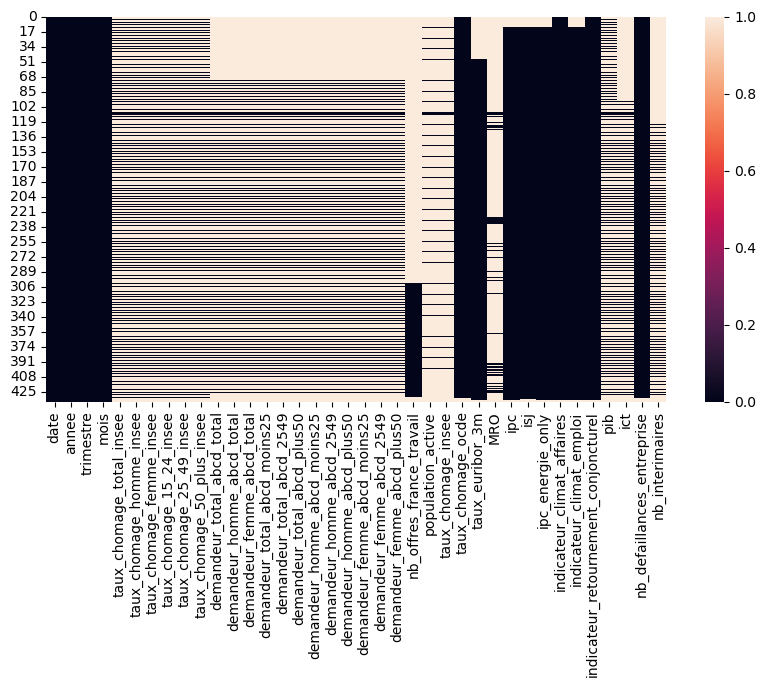

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna());

### Application de FFILL()

In [11]:
df_filled = df.ffill()

In [12]:
df_filled

,date,annee,trimestre,mois,taux_chomage_total_insee,taux_chomage_homme_insee,taux_chomage_femme_insee,taux_chomage_15_24_insee,taux_chomage_25_49_insee,taux_chomage_50_plus_insee,...,ipc,isj,ipc_energie_only,indicateur_climat_affaires,indicateur_climat_emploi,indicateur_retournement_conjoncturel,pib,ict,nb_defaillances_entreprise,nb_interimaires
0,1990-01-01,1990,1,1,8.1,6.3,10.3,16.9,6.9,5.1,...,NaN,NaN,NaN,115.7,NaN,1.0,388956.0,NaN,3998.0,NaN
1,1990-02-01,1990,1,2,8.1,6.3,10.3,16.9,6.9,5.1,...,NaN,NaN,NaN,113.5,NaN,0.9,388956.0,NaN,3815.0,NaN
2,1990-03-01,1990,1,3,8.1,6.3,10.3,16.9,6.9,5.1,...,NaN,NaN,NaN,111.5,NaN,0.9,388956.0,NaN,4304.0,NaN
3,1990-04-01,1990,2,4,8.0,6.3,10.2,16.8,6.8,5.1,...,NaN,NaN,NaN,110.9,NaN,0.7,391046.0,NaN,3506.0,NaN
4,1990-05-01,1990,2,5,8.0,6.3,10.2,16.8,6.8,5.1,...,NaN,NaN,NaN,110.7,NaN,0.9,391046.0,NaN,3744.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2025-10-01,2025,4,10,7.9,8.1,7.6,21.5,6.9,5.1,...,0.9,1.2,-5.6,96.5,94.7,-0.5,661062.0,112.8,6364.0,705598.523373
432,2025-11-01,2025,4,11,7.9,8.1,7.6,21.5,6.9,5.1,...,0.9,1.0,-4.6,97.7,96.4,-0.3,661062.0,112.8,6364.0,705598.523373
433,2025-12-01,2025,4,12,7.9,8.1,7.6,21.5,6.9,5.1,...,0.8,1.0,-6.8,98.7,94.5,0.1,661062.0,112.8,6364.0,705598.523373
434,2026-01-01,2026,1,1,7.9,8.1,7.6,21.5,6.9,5.1,...,0.8,1.0,-6.8,98.7,94.5,0.1,661062.0,112.8,6364.0,705598.523373


In [13]:
df_filled.isna().sum()

date                                      0
annee                                     0
trimestre                                 0
mois                                      0
taux_chomage_total_insee                  0
taux_chomage_homme_insee                  0
taux_chomage_femme_insee                  0
taux_chomage_15_24_insee                  0
taux_chomage_25_49_insee                  0
taux_chomage_50_plus_insee                0
demandeur_total_abcd_total               72
demandeur_homme_abcd_total               72
demandeur_femme_abcd_total               72
demandeur_total_abcd_moins25             72
demandeur_total_abcd_2549                72
demandeur_total_abcd_plus50              72
demandeur_homme_abcd_moins25             72
demandeur_homme_abcd_2549                72
demandeur_homme_abcd_plus50              72
demandeur_femme_abcd_moins25             72
demandeur_femme_abcd_2549                72
demandeur_femme_abcd_plus50              72
nb_offres_france_travail        

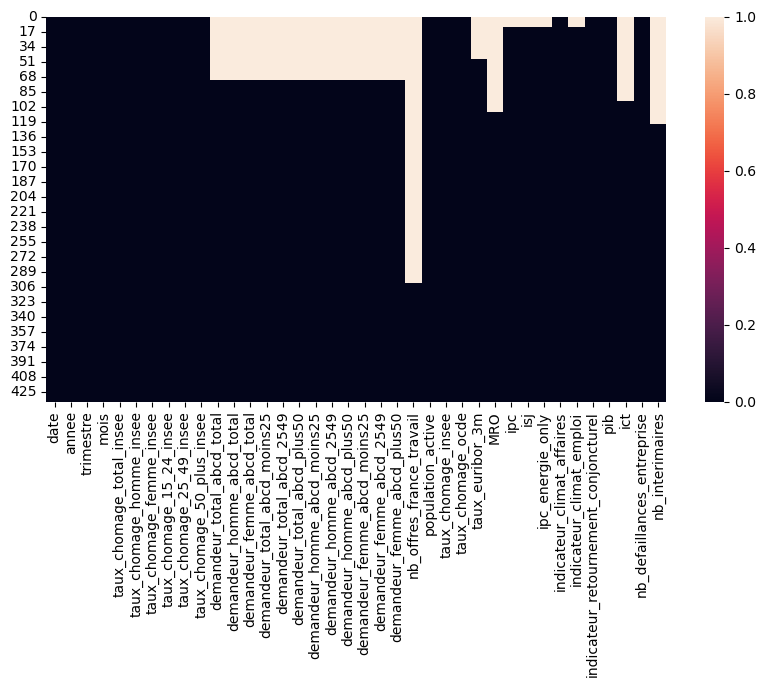

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df_filled.isna());

à noter que la variable Offres d'emploi France Travail (`nb_offres_france_travail`) ne débute qu'en 2015 :

| Titre (Variable) | Fréquence | Date début | Date fin |
| :--- | :--- | :--- | :--- |
...
| Offres d'emploi France Travail (`nb_offres_france_travail`) | Mensuelle | 01/01/2015 | 30/09/2025 |
...

## Visualisation du dataframe final

In [15]:
df_filled.tail(20)

,date,annee,trimestre,mois,taux_chomage_total_insee,taux_chomage_homme_insee,taux_chomage_femme_insee,taux_chomage_15_24_insee,taux_chomage_25_49_insee,taux_chomage_50_plus_insee,...,ipc,isj,ipc_energie_only,indicateur_climat_affaires,indicateur_climat_emploi,indicateur_retournement_conjoncturel,pib,ict,nb_defaillances_entreprise,nb_interimaires
416,2024-07-01,2024,3,7,7.4,7.6,7.1,19.7,6.6,4.7,...,2.3,1.5,8.5,94.4,97.2,-1.0,655027.0,110.1,5843.0,726325.294868
417,2024-08-01,2024,3,8,7.4,7.6,7.1,19.7,6.6,4.7,...,1.8,1.7,0.4,96.6,98.4,0.7,655027.0,110.1,1599.0,726325.294868
418,2024-09-01,2024,3,9,7.4,7.6,7.1,19.7,6.6,4.7,...,1.1,1.4,-3.3,97.4,98.6,-0.8,655027.0,110.1,6314.0,726325.294868
419,2024-10-01,2024,4,10,7.3,7.4,7.1,18.7,6.6,4.7,...,1.2,1.4,-2.0,97.0,97.4,-0.9,654734.0,111.3,6554.0,713974.330136
420,2024-11-01,2024,4,11,7.3,7.4,7.1,18.7,6.6,4.7,...,1.3,1.5,-0.7,96.1,98.4,-0.7,654734.0,111.3,6099.0,713974.330136
421,2024-12-01,2024,4,12,7.3,7.4,7.1,18.7,6.6,4.7,...,1.3,1.3,1.2,95.0,96.5,-0.9,654734.0,111.3,5752.0,713974.330136
422,2025-01-01,2025,1,1,7.5,7.5,7.4,19.2,6.8,4.8,...,1.7,1.4,2.7,95.4,97.0,-0.7,655389.0,112.3,5948.0,710419.927973
423,2025-02-01,2025,1,2,7.5,7.5,7.4,19.2,6.8,4.8,...,0.8,1.3,-5.8,95.9,93.5,-0.6,655389.0,112.3,5826.0,710419.927973
424,2025-03-01,2025,1,3,7.5,7.5,7.4,19.2,6.8,4.8,...,0.8,1.3,-6.6,96.6,96.4,-0.6,655389.0,112.3,6382.0,710419.927973
425,2025-04-01,2025,2,4,7.6,7.7,7.4,19.1,6.9,4.8,...,0.8,1.3,-7.8,97.1,97.8,-0.3,657523.0,112.2,5863.0,709895.580836


# Export du nouveau dataset au format CSV

In [16]:
repertoire_data_processed = Path.cwd().parent.parent / "data" / "processed"
chemin_export = repertoire_data_processed / "02_dataset_clean.csv"

df_filled.to_csv(chemin_export, index=False, encoding='utf-8')